In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/onehot.csv')
# drop Name Column
df.drop('Name', axis=1, inplace=True)

# # randomize the rows
# df = df.sample(frac=1).reset_index(drop=True)

df

,Class,sodium,extract,alcohol,water,glycerin,glycol,acid,dimethicone,fragrance,...,tomato,pyrus,tromethamine,hedera,helix,fillers,proprietary,microcapsules,https,pinterest
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1,1,0,0,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1096,1,1,0,0,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1097,1,1,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1098,1,1,1,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis=1), df['Class'], test_size=0.3, random_state=47)

In [5]:
X_trainC, X_testC, y_trainC, y_testC = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [6]:
# X_train.shape

In [7]:
# y_train.shape

In [8]:
svm = SVC(kernel="linear")
svm.fit(X_train, y_train)

import time
start = time.time()
y_pred = svm.predict(X_test)
print("Time taken: ", time.time() - start)

Time taken:  0.017037630081176758


In [9]:
accuracy_score(y_test, y_pred)*100 

95.15151515151516

In [10]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[156,   7],
       [  9, 158]])

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       163
           1       0.96      0.95      0.95       167

    accuracy                           0.95       330
   macro avg       0.95      0.95      0.95       330
weighted avg       0.95      0.95      0.95       330



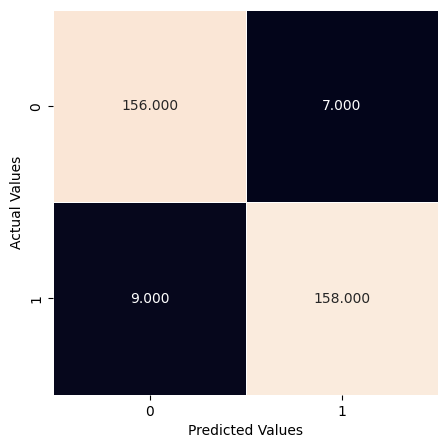

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='0.3f', linewidth=0.5, square=True, cbar=False)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [14]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=100)

In [16]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [17]:
X_train_trf.shape

(770, 100)

In [18]:

svm = SVC(kernel="linear")
svm.fit(X_train_trf, y_train)

start = time.time()
y_pred = svm.predict(X_test_trf)
print("Time taken: ", time.time() - start)



Time taken:  0.0008809566497802734


In [19]:
accuracy_score(y_test, y_pred)*100

95.75757575757575

In [20]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[155,   8],
       [  6, 161]])

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       163
           1       0.95      0.96      0.96       167

    accuracy                           0.96       330
   macro avg       0.96      0.96      0.96       330
weighted avg       0.96      0.96      0.96       330



In [22]:
# for i in range (1,1672):
#     pca = PCA(n_components=i)
#     X_train_trf = pca.fit_transform(X_train)
#     X_test_trf = pca.transform(X_test)

#     svm = SVC(kernel="linear")
#     svm.fit(X_train_trf, y_train)

#     y_pred = svm.predict(X_test_trf)

#     print(accuracy_score(y_test, y_pred)*100)    

In [23]:
# tranforming to a 2D coordinate system
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)


In [24]:
X_train_trf

array([[16.18460917,  0.26172543, -1.80975782],
       [-2.25613159, -0.57911395,  0.32307896],
       [ 3.14984901, -0.23949865, -3.47708646],
       ...,
       [ 8.10594338, -0.50151983, -5.72350158],
       [-0.15575691, -0.293715  , -0.72359399],
       [-2.49729983, -0.38221368,  0.63594365]])

In [25]:
# import plotly.express as px
# y_train_trf = y_train.astype(str)
# fig = px.scatter(x=X_train_trf[:,0], y=X_train_trf[:,1], color=y_train_trf,
#                  color_discrete_sequence=px.colors.qualitative.G10)
# fig.show()

In [26]:
pca.explained_variance_

array([32.10953305, 26.72065442, 26.03637327])

In [27]:
pca.components_.shape

(3, 1672)

In [28]:
pca.explained_variance_ratio_

array([0.02313696, 0.01925393, 0.01876087])

In [29]:
X_train, X_test, y_train, y_test = X_trainC.copy(), X_testC.copy(), y_trainC.copy(), y_testC.copy()

In [30]:
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [31]:
pca.explained_variance_

array([1.4888591 , 0.64497943, 0.42363503])

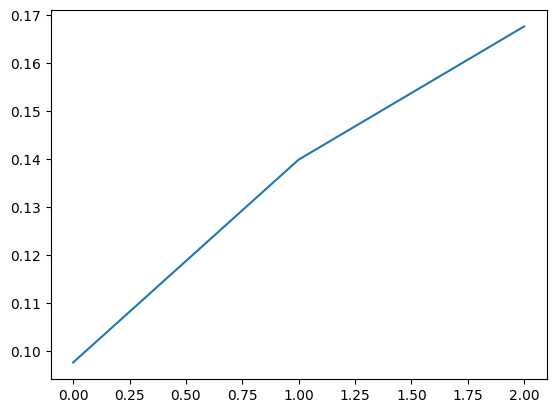

In [32]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))